### Description: Creating and Plotting multiple Technical Indicators.
- Technical Indicators: They are mathematical calculations based on things like the stock price or the stock volume.
- Technical analysts and traders use these indicators and historical data to try and predict future price movements.


Importing Libraries

In [14]:
import pandas as pd
import numpy as np
import pandas_datareader as web
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')

Get the stock quote

In [15]:
df = web.DataReader('TSLA', data_source = 'yahoo', start = '2020-01-01', end = '2021-01-25')

Show the Data

In [16]:
df

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2020-01-02,86.139999,84.342003,84.900002,86.052002,47660500.0,86.052002
2020-01-03,90.800003,87.384003,88.099998,88.601997,88892500.0,88.601997
2020-01-06,90.311996,88.000000,88.094002,90.307999,50665000.0,90.307999
2020-01-07,94.325996,90.671997,92.279999,93.811996,89410500.0,93.811996
2020-01-08,99.697998,93.646004,94.739998,98.428001,155721500.0,98.428001
...,...,...,...,...,...,...
2021-01-19,850.000000,833.000000,837.799988,844.549988,25367000.0,844.549988
2021-01-20,859.500000,837.280029,858.739990,850.450012,25665900.0,850.450012
2021-01-21,855.719971,841.419983,855.000000,844.989990,20598100.0,844.989990


Get the number of rows and columns in the data set

In [17]:
df.shape

(268, 6)

Visualize the closing price history

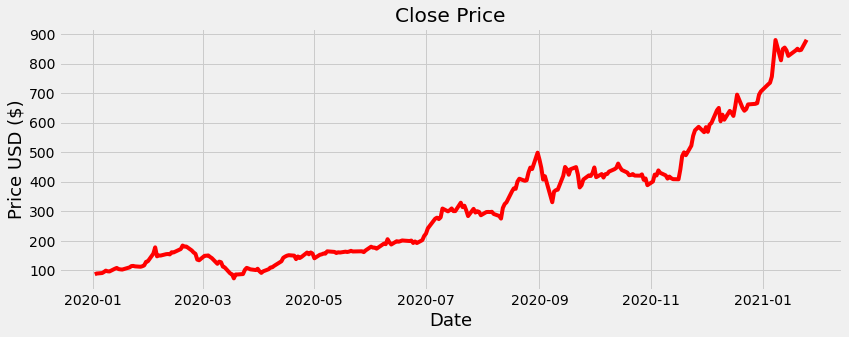

In [18]:
plt.figure(figsize = (12.5, 4.5))
plt.plot(df['Close'], label = 'Close', color = 'red')
plt.title('Close Price')
plt.xlabel('Date', fontsize = 18)
plt.ylabel('Price USD ($)', fontsize = 18)
plt.show()

Creating Functions to calculate the SMA and EMA
- SMA: Simple Moving Average
   
   
   *A simple moving average (SMA) calculates the average of a selected range of prices, usually closing prices, by the number of periods in that range. A simple moving average is a technical indicator that can aid in determining if an asset price will continue or if it will reverse a bull or bear trend.* (source: google Jan 27,2021)
- EMA: Exponential Moving Average

*The exponential moving average (EMA) is a technical chart indicator that tracks the price of an investment (like a stock or commodity) over time. The EMA is a type of weighted moving average (WMA) that gives more weighting or importance to recent price data.*
(source: google Jan 27,2021)

-  a common time period to use for moving averages are 15, 20, 30, 50, 100 and 200 days.


1st Creating the Simple Moving Average (SMA)


In [19]:
def SMA(data, period=30, column='Close'):
  return data[column].rolling(window=period).mean()

2nd Creating the Exponential Moving Average (EMA)

In [24]:
def EMA(data, period=20, column='Close'):
  return data[column].ewm(span=period, adjust=False).mean()

Calculating the MACD
- MACD: Moving Average Convergence/Divergence

*Moving average convergence divergence (MACD) is a trend-following momentum indicator that shows the relationship between two moving averages of a security's price. ... Traders may buy the security when the MACD crosses above its signal line and sell—or short—the security when the MACD crosses below the signal line.* (source: Jan 27,2021)
- longer period has a 26 day exponential moving average. 
- shorter period has a 20 day exponential moving average.
- MACD also have a signal line which is recommended to have a 9 day exponential moving average.



In [25]:
def MACD(data, period_long=26, period_short=12, period_signal=9, column='Close'):
  
  #Calculating the Short Term Exponential Moving Average
  ShortEMA = EMA(data, period_short, column=column)

  #Calculating the Long Term Exponential Moving Average
  LongEMA = EMA(data, period_long, column=column)

  #Calculating the Moving Average Convergence/Divergence (MACD)
  data['MACD'] = ShortEMA - LongEMA

  #Calculating the signal line
  data['Signal_line'] = EMA(data, period_signal, column='MACD')

  return data

Creating a function for computing the RSI
- RSI: Relative Strength Index

*The relative strength index (RSI) is a momentum indicator used in technical analysis that measures the magnitude of recent price changes to evaluate overbought or oversold conditions in the price of a stock or other asset.* (source: Jan 27,2021)
-  Here defaulting to recommended 14 day time period.
- diff function is used to find the discrete difference over the column axis.

In [29]:
def RSI(data, period=14, column='Close'):
  delta = data[column].diff(1)
  delta = delta[1:]
  up = delta.copy()
  down = delta.copy()
  up[up < 0] = 0
  down[down > 0] = 0
  data['up'] = up
  data['down'] = down
  AVG_Gain = SMA(data, period, column='up')
  AVG_Loss = abs(SMA(data, period, column='down'))
  RS = AVG_Gain / AVG_Loss
  RSI = 100.0 - (100.0/(1.0 + RS))

  data['RSI'] = RSI

  return data

Creating/Adding the data set


In [30]:
MACD(df)
RSI(df)
df['SMA'] = SMA(df)
df['EMA'] = EMA(df)

Show the data

In [31]:
df

,High,Low,Open,Close,Volume,Adj Close,MACD,Signal_line,up,down,RSI,SMA,EMA
Date,,,,,,,,,,,,,
2020-01-02,86.139999,84.342003,84.900002,86.052002,47660500.0,86.052002,0.000000,0.000000,NaN,NaN,NaN,NaN,86.052002
2020-01-03,90.800003,87.384003,88.099998,88.601997,88892500.0,88.601997,0.203418,0.040684,2.549995,0.000000,NaN,NaN,86.294859
2020-01-06,90.311996,88.000000,88.094002,90.307999,50665000.0,90.307999,0.496565,0.131860,1.706001,0.000000,NaN,NaN,86.677062
2020-01-07,94.325996,90.671997,92.279999,93.811996,89410500.0,93.811996,1.000101,0.305508,3.503998,0.000000,NaN,NaN,87.356580
2020-01-08,99.697998,93.646004,94.739998,98.428001,155721500.0,98.428001,1.751440,0.594694,4.616005,0.000000,NaN,NaN,88.411001
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2021-01-19,850.000000,833.000000,837.799988,844.549988,25367000.0,844.549988,67.048214,63.355476,18.390015,0.000000,74.113377,708.490666,761.755023
2021-01-20,859.500000,837.280029,858.739990,850.450012,25665900.0,850.450012,65.935480,63.871477,5.900024,0.000000,74.359515,716.871000,770.202165
2021-01-21,855.719971,841.419983,855.000000,844.989990,20598100.0,844.989990,63.876722,63.872526,0.000000,-5.460022,71.139062,723.645333,777.324815



Creating a list of columns to keep MACD and Signal_line

In [40]:
column_list = ['MACD', 'Signal_line']


Plotting the chart of MACD for TESLA

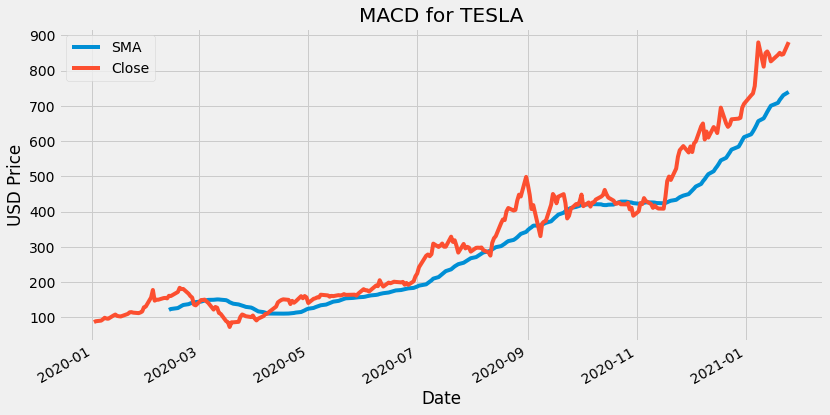

In [45]:
df[column_list].plot(figsize=(12.2, 6.4))
plt.title('MACD for TESLA')
plt.xlabel('Date')
plt.ylabel('USD Price')
plt.show()


Creating a list of columns to keep SMA and Close

In [44]:
column_list = ['SMA', 'Close']

Plotting the chart of SMA for TESLS

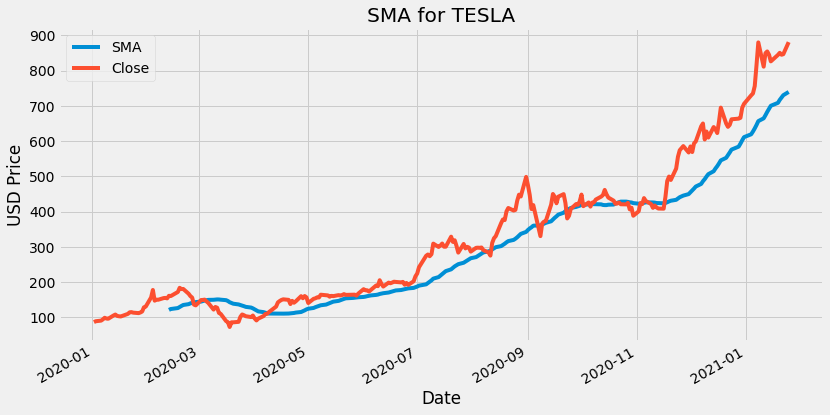

In [46]:
df[column_list].plot(figsize=(12.2, 6.4))
plt.title('SMA for TESLA')
plt.xlabel('Date')
plt.ylabel('USD Price')
plt.show()

Creating a list of columns to keep EMA and Close

In [51]:
column_list = ['EMA', 'Close']

Plotting the chart of EMA for TESLS

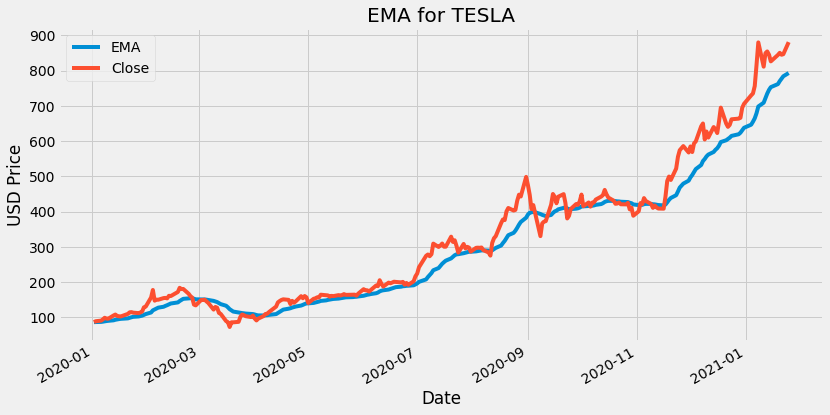

In [52]:
df[column_list].plot(figsize=(12.2, 6.4))
plt.title('EMA for TESLA')
plt.xlabel('Date')
plt.ylabel('USD Price')
plt.show()

Creating a list of columns to keep RSI 

In [53]:
column_list = ['RSI']

Plotting the chart of RSI for TESLS

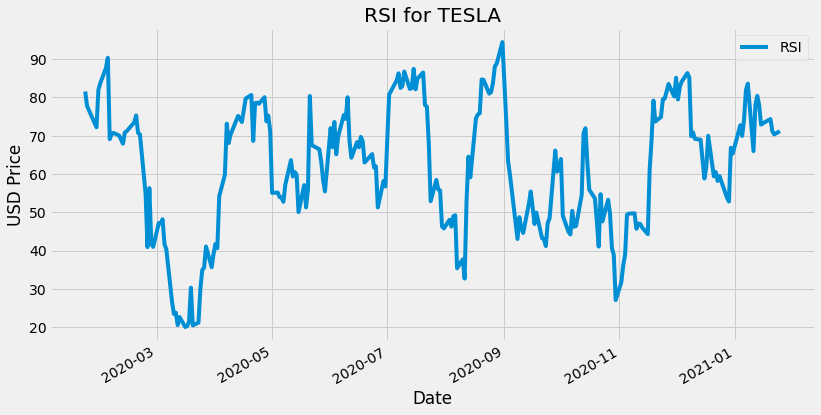

In [54]:
df[column_list].plot(figsize=(12.2, 6.4))
plt.title('RSI for TESLA')
plt.xlabel('Date')
plt.ylabel('USD Price')
plt.show()

- Redundancy is a common problem and technical analysis that occurs when the same type of indicators are applied to one chart, redundant signals can be misleading.
-  Moving average crossover can be complementary to something like the RSI to confirm RSI indications that a market is overbought or that is oversold.

COMPLETE